In [3]:
from graph_tool.all import *
from smodels.theory import element

In [12]:
el = element.Element("[[['q','l'],['e','nu']],[['W']]]")
print(el.getEinfo())
for br in el.branches:
    print(br.particles)

{'vertnumb': [2, 1], 'vertparts': [[2, 2], [1]]}
[['q', 'l'], ['e', 'nu']]
[['W']]


In [21]:
def fromElementToGraph(el):
    
    top = Graph(directed=True)
    top.vertex_properties['label'] = top.new_vertex_property("string","")
    #Create Initial production vertex:
    primaryVertex = top.add_vertex()
    for branch in el.branches:        
        lastVertex = primaryVertex
        for part in branch.particles:
            vertex = top.add_vertex()
            top.add_edge(lastVertex,vertex)
            lastVertex = vertex
            for finalState in part:
                vertex = top.add_vertex()
                top.add_edge(lastVertex,vertex)
                top.vp.label[vertex] = finalState
        finalBSM = top.add_vertex()
        top.add_edge(lastVertex,finalBSM)
        top.vp.label[finalBSM] = 'lsp'
        
    return top
        

In [22]:
top = fromElementToGraph(el)

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:637: UserWarning: Unknown parameter: size
  warnings.warn("Unknown parameter: " + k, UserWarning)


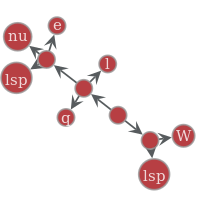

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3748016c18, at 0x7f3748016438>

In [24]:
graph_draw(top, vertex_text=top.vp.label, vertex_font_size=15, inline=True,output_size=(200,200),size=3)